Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [4]:
import pandas as pd

def film_class(raw):
    if raw['rating'] <= 2:
        return "низкий рейтинг"
    elif raw['rating'] <= 4:
        return "средний рейтинг"
    elif raw['rating'] > 4:
        return "высокий рейтинг"
    return 'нет рейтинга'

ratings = pd.read_csv('ml-latest-small/ratings.csv')

data['class'] = ratings.groupby('movieId').mean().apply(film_class, axis=1)
data.head()

,rating,class
movieId,,
1,3.920930,средний рейтинг
2,3.431818,средний рейтинг
3,3.259615,средний рейтинг
4,2.357143,средний рейтинг
5,3.071429,средний рейтинг


Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [8]:
import pandas as pd

def define_region(raw):
    for region in geo_data:
        for city in geo_data[region]:
            if region == 'Центр':         # В списке городов региона Центр окончания городов меняются. Например, 'эхо москвы' стр. 143
                city = city[:-1]          # Поэтому для поиска убираем последний символ.
            if city in raw['keyword']:
                find_region = region
                return find_region
            return 'undefined'

df_keywords = pd.read_csv('keywords.csv')

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

df_keywords['region'] = df_keywords.apply(define_region, axis=1)
print (df_keywords.head())


         keyword     shows     region
0             вк  64292779  undefined
1  одноклассники  63810309  undefined
2          порно  41747114  undefined
3           ютуб  39995567  undefined
4      вконтакте  21014195  undefined
keyword    эхо москвы
shows          889657
region          Центр
Name: 143, dtype: object


Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [11]:
import pandas as pd

def production_year(raw):
    
    for x in year:
        if x in raw['title']:
            return  x
        
    return  '1900'

ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

joined = ratings.merge(movies, on='movieId', how='left')

year = []
for i in range(1950,2011):                              # список из всех годов с 1950 по 2010
    year.append(str(i))
    
joined['year'] = joined.apply(production_year, axis=1)  # добавляем столбец 'year'

data = joined.groupby('year').mean()['rating']          # Подсчитываем средний рейтинг по годам

data.sort_values(ascending=False).head()                # Да, рейтинги у старых фильмов выше

year
1957    4.039535
1954    4.009191
1962    3.969466
1952    3.953125
1972    3.944293
Name: rating, dtype: float64

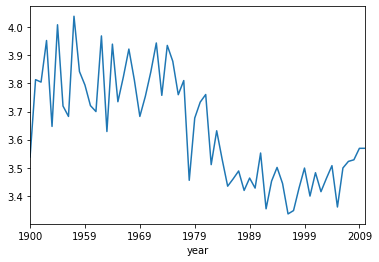

In [12]:
data.plot()                                             # Это наглядно видно на графике